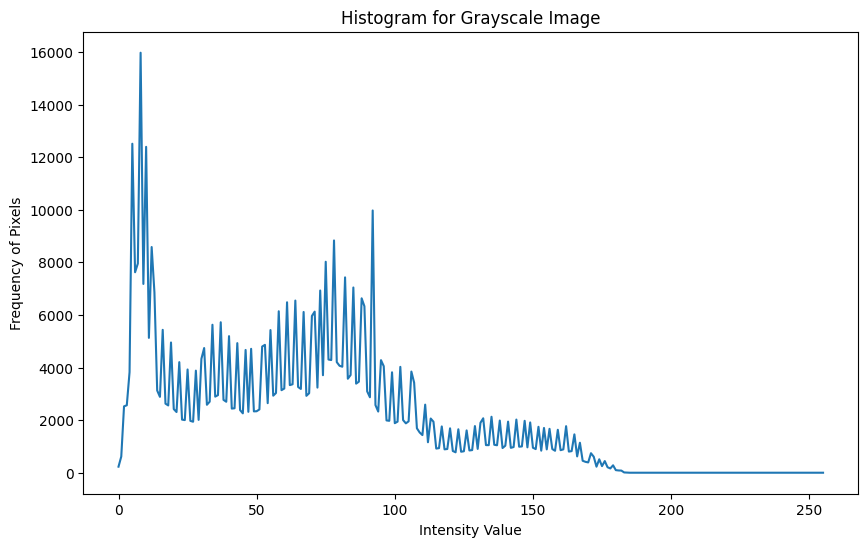

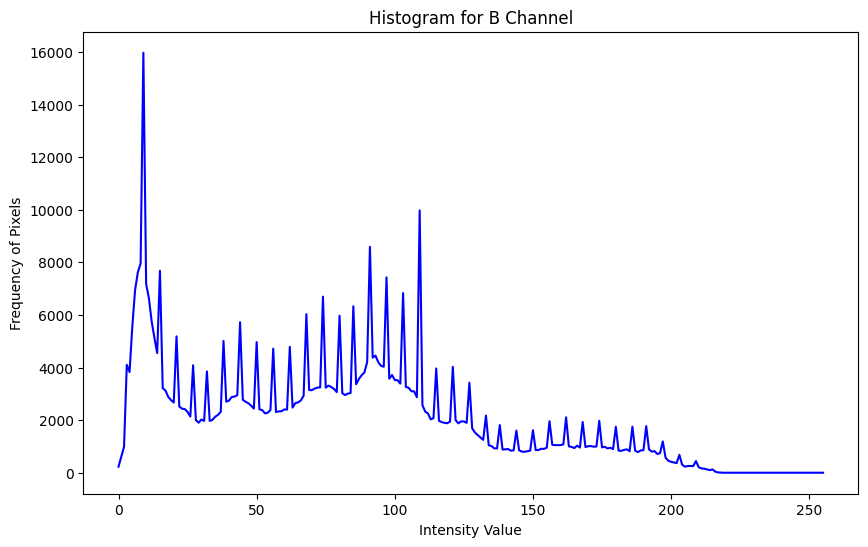

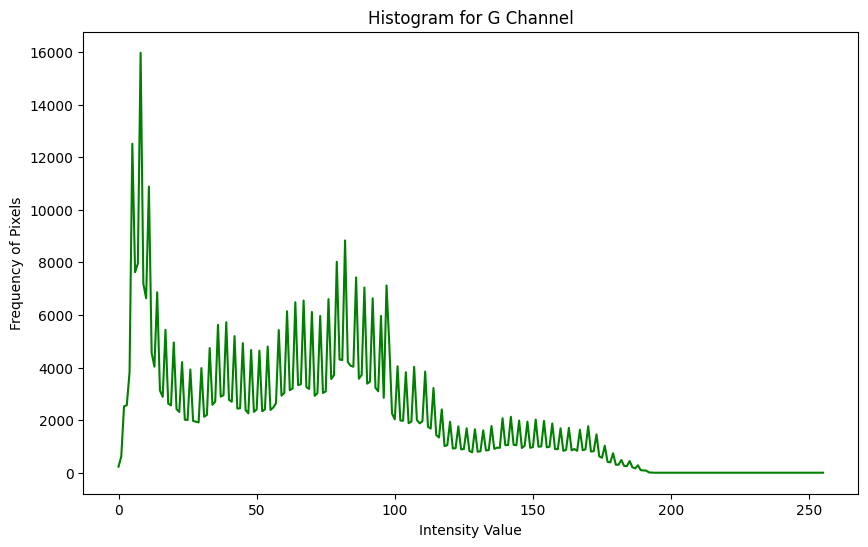

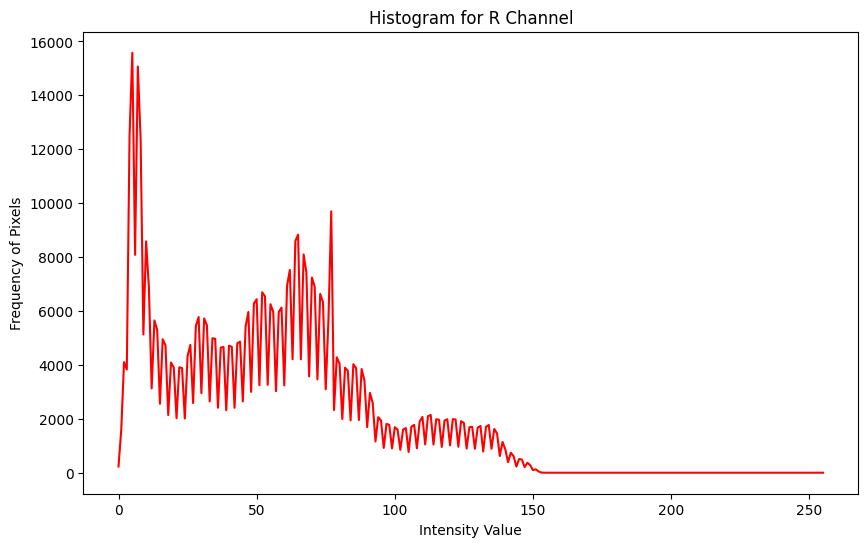

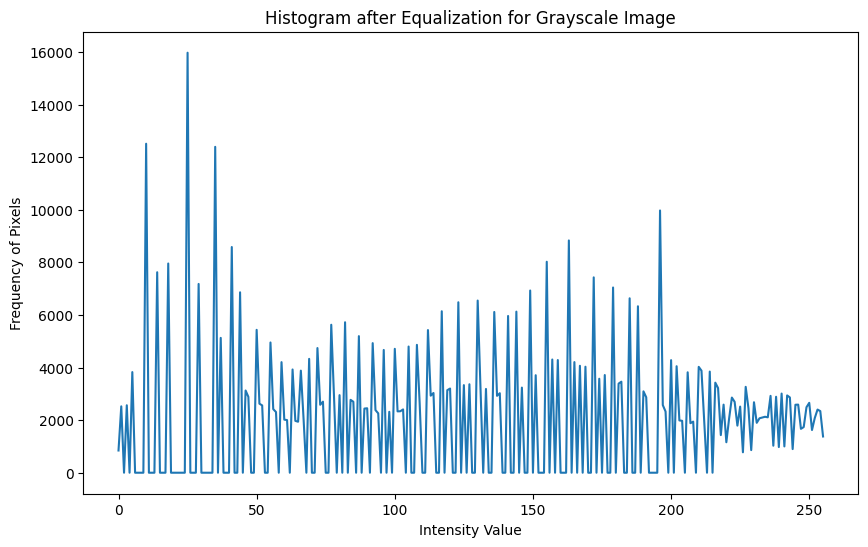

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Lena_Image.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.title('Histogram for Grayscale Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency of Pixels')
plt.plot(gray_hist)
plt.show()

channels = ('b', 'g', 'r')
colors = ('blue', 'green', 'red')

for i, color in enumerate(channels):
    channel_hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.figure(figsize=(10, 6))
    plt.title(f'Histogram for {color.upper()} Channel')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency of Pixels')
    plt.plot(channel_hist, color=colors[i])
    plt.show()

equalized_gray = cv2.equalizeHist(gray_image)

equalized_hist = cv2.calcHist([equalized_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.title('Histogram after Equalization for Grayscale Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency of Pixels')
plt.plot(equalized_hist)
plt.show()

equalized_image = cv2.merge([
    cv2.equalizeHist(image[:, :, 0]),
    cv2.equalizeHist(image[:, :, 1]),
    cv2.equalizeHist(image[:, :, 2])
])

cv2.imwrite('equalized_image.jpg', equalized_image)


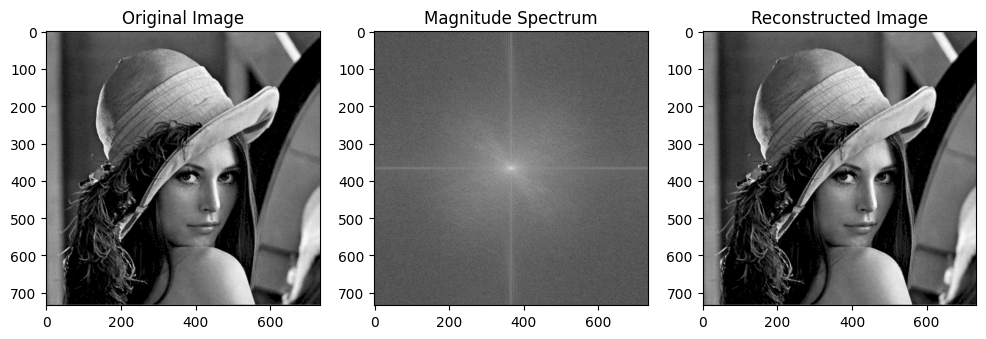

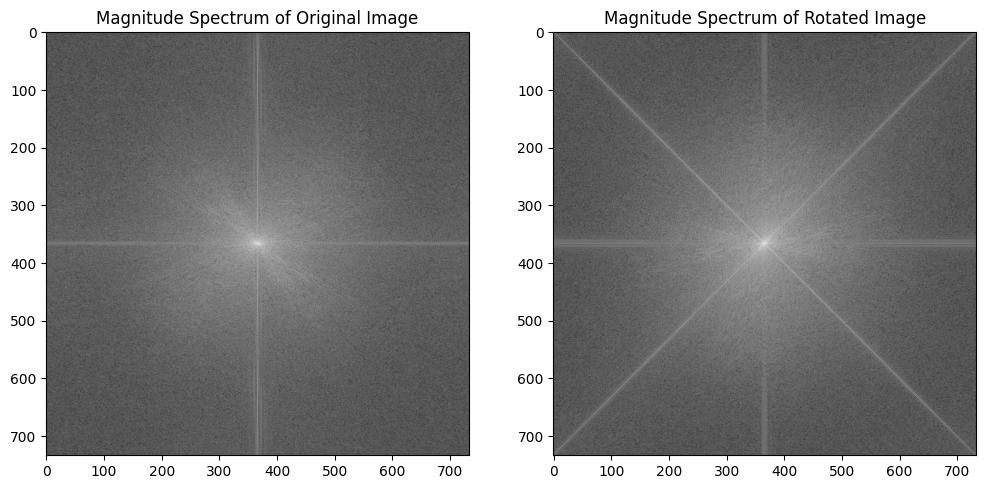

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

gray_image = cv2.imread('Lena_Image.png', cv2.IMREAD_GRAYSCALE)

dft = np.fft.fft2(gray_image)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = np.log(np.abs(dft_shift) + 1)

idf_shift = np.fft.ifftshift(dft_shift)
reconstructed_image = np.fft.ifft2(idf_shift)
reconstructed_image = np.abs(reconstructed_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')

plt.show()


angle = 45
(h, w) = gray_image.shape
center = (w // 2, h // 2)


rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))

dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shift = np.fft.fftshift(dft_rotated)

magnitude_spectrum_rotated = np.log(np.abs(dft_rotated_shift) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_image))) + 1), cmap='gray')
plt.title('Magnitude Spectrum of Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title('Magnitude Spectrum of Rotated Image')

plt.show()
